# Scientific Exploration of Zomato Bangalore Restaurants

# Table of Contents
1. Problem Statement
2. Objective
3. Installing & Importing Libraries
4. Data Acquisition & Description
5. Data Cleaning
6. Exploratory Data Analysis
7. Conclusion

# 1. Problem Statement
Provide valuable insights for individuals planning to open a restaurant in Bengaluru, India, by analyzing restaurant data and deriving recommendations on location selection, facility offerings, cuisine specialization, and customer preferences.

# 2. Objective
Analyze restaurant data to identify favorable locations with less competition, evaluate the impact of online order and book table facilities on ratings and rates, determine popular cuisines and customer preferences, and provide actionable recommendations for opening a successful restaurant.

# 3. Installing & Importing Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Data Acquisition & Description


The data was collected from Kaggle and made available by Mr. Himanshu Poddar and Zomato Bangalore Restaurants.

In [ ]:
# pd.set_option('display.expand_frame_repr', False)

In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/GitHub_Project/Kaggle_Datasets/zomato.csv'
data = pd.read_csv(path)
print('Total rows and columns: ', data.shape)
print(data.head())

Total rows and columns:  (51717, 17)
                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233 

## 4.1 Data Information
In this section, we will get information about the data and see some observations.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Observations:

Apart from the columns mentioned in section 4.1, rate, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people) columns have some missing values which should be dealt with and unnecessary columns should be dropped.

The data types of all the columns look appropriate except rate column.

Columns with longer names should be changed to shorter names.

# 5. Data Cleaning

## 5.1 Removing unnecessary columns/ features

In [ ]:
data = data.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis=1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## 5.2 Dropping Duplicates

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(51609, 11)

## 5.3 Cleaning 'rate' Column

In [ ]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## 5.4 Removing "NEW" , "-" and "/5" from Rate Column

In [ ]:
data['rate'].dtypes

dtype('O')

In [ ]:
data['rate'] = data['rate'].replace(['NEW','-'], np.nan)

In [ ]:
data['rate'] = data['rate'].str.split('/').str[0].astype(float)

In [ ]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## 5.5 Replacing null values with mean value of 'rate' column

In [ ]:
data['rate'] = data['rate'].fillna(data['rate'].mean())
data['rate'].isnull().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


## 5.6 Dropping null values

In [ ]:
data.dropna(inplace = True) #There are null values present in location, rest_type, cuisines, approx_cost(for two people) but they are not many, so dropping them
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## 5.7 Renaming columns to shorter names

In [ ]:
data.rename(columns={'approx_cost(for two people)': 'cost2plates','listed_in(type)':'type'},inplace= True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## 5.8 Dropping listed_in(city) column because location and listed_in(city) both are there

In [ ]:
data = data.drop(['listed_in(city)'], axis=1)

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
data['cost2plates'].unique() # because of comma(') present in rate column values it makes string value

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
data['cost2plates'].dtypes

dtype('O')

In [ ]:
data['cost2plates'] = data['cost2plates'].str.replace(',','').astype(float)

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## 5.9 Cleaning 'rest_type' column

In [ ]:
data['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_type_counts = data['rest_type'].value_counts()

less_than_1000 = rest_type_counts[rest_type_counts < 1000].index

data.loc[data['rest_type'].isin(less_than_1000), 'rest_type'] = 'others'

In [ ]:
data['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

## 5.10 Cleaning 'location' column

In [ ]:
data['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [ ]:
location_counts = data['location'].value_counts()

count_less_than_300 = location_counts[location_counts<300].index

data.loc[data['location'].isin(count_less_than_300),'location'] = 'others'

In [ ]:
data['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


## 5.11 Cleaning 'cuisines' column

In [ ]:
data['cuisines'].nunique()

2704

In [ ]:
data['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [ ]:
a = data['cuisines'].value_counts()
b = a[a<100].index
data.loc[data['cuisines'].isin(b),'cuisines'] = 'others'

In [ ]:
data['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [ ]:
data['type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: type, dtype: int64

## Data has been cleaned now. We can move forward for analysis through visualization.

# 6. Exploratory Data Analysis

## 6.1 Distribution of restaurants across location

In [ ]:
def count_plot(data= None,xcolumn= None):
  figure = plt.figure(figsize=[15,7])
  data[xcolumn].value_counts().plot.bar()
  plt.xlabel(xlabel= xcolumn, size= 14)
  plt.ylabel(ylabel = 'count', size= 14)
  plt.title(label= 'Distribution of '+xcolumn, size = 16)
  plt.show()

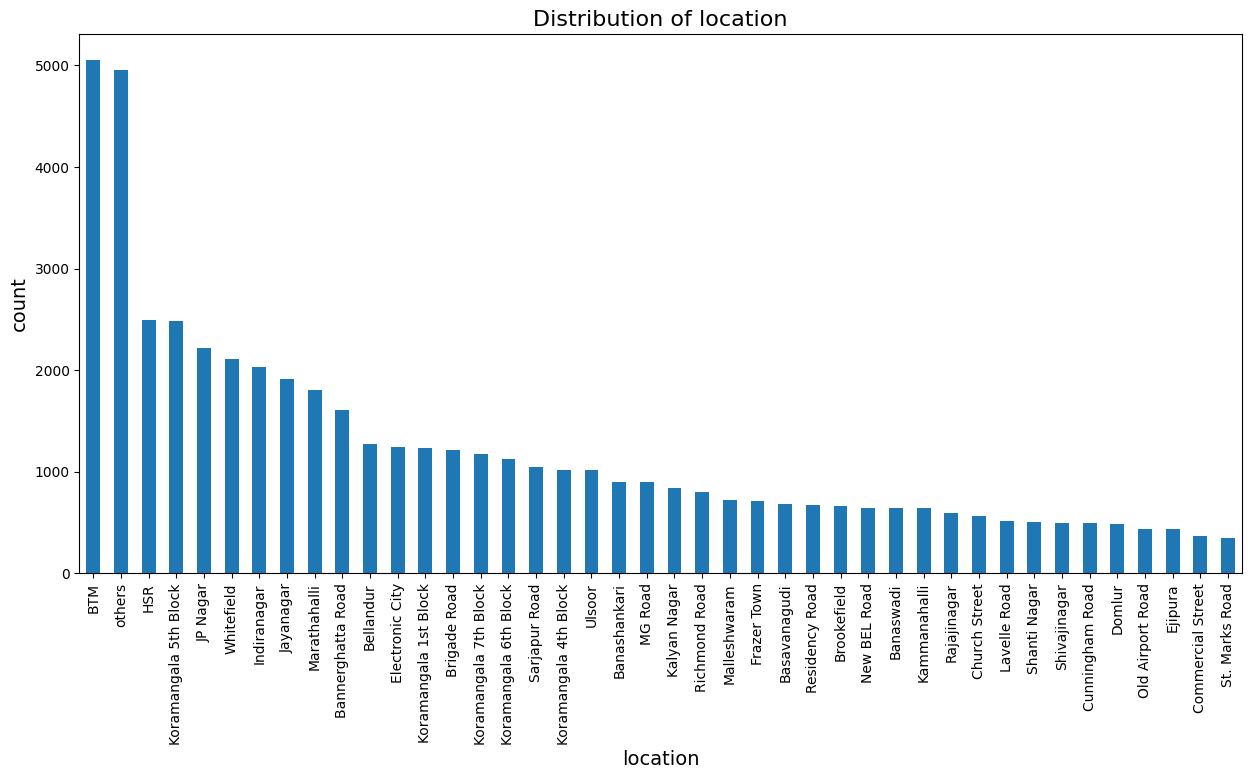

In [ ]:
count_plot(data= data,xcolumn= 'location')

## Observation
It is advisable not to open a restaurant in areas with a high concentration of existing restaurants, such as 'BTM', 'Jayanagar', 'HSR', 'JP Nagar', 'Indiranagar', etc. Instead, it is more favorable to open a restaurant in areas with fewer restaurants, such as 'Old Airport Road' or 'St. Marks Road'.

## 6.2 Visualizing 'online_order'

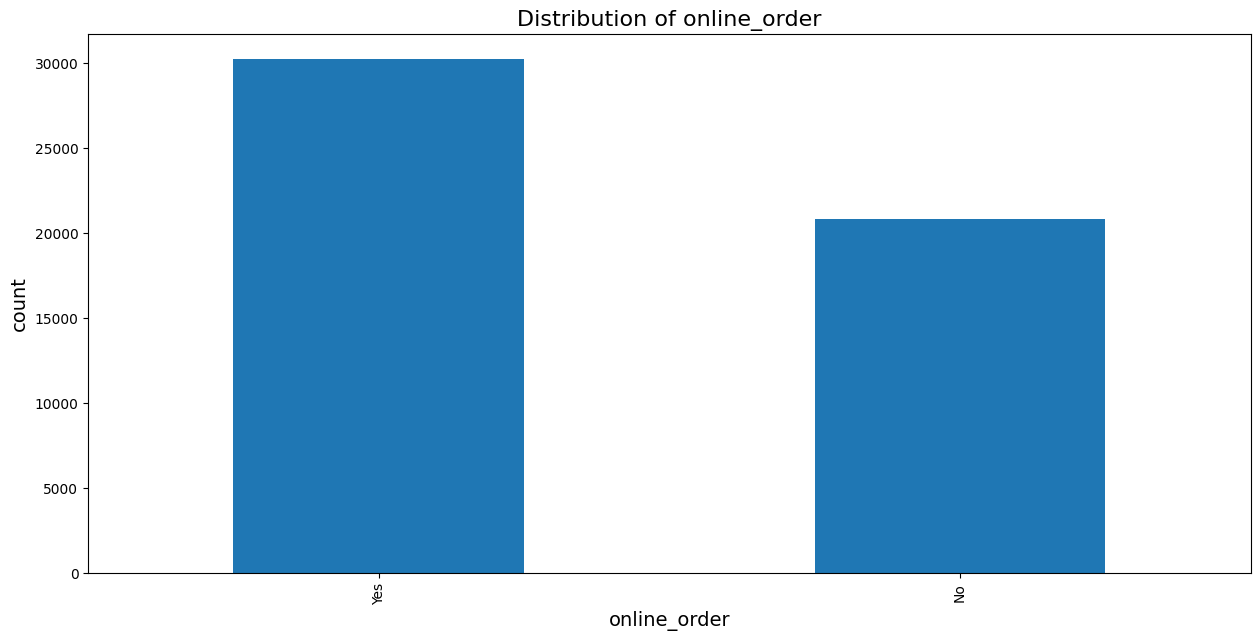

In [ ]:
count_plot(data= data,xcolumn= 'online_order')

## Observations
Most of the restaurants have online order facility

## 6.3 Visualizing book_table

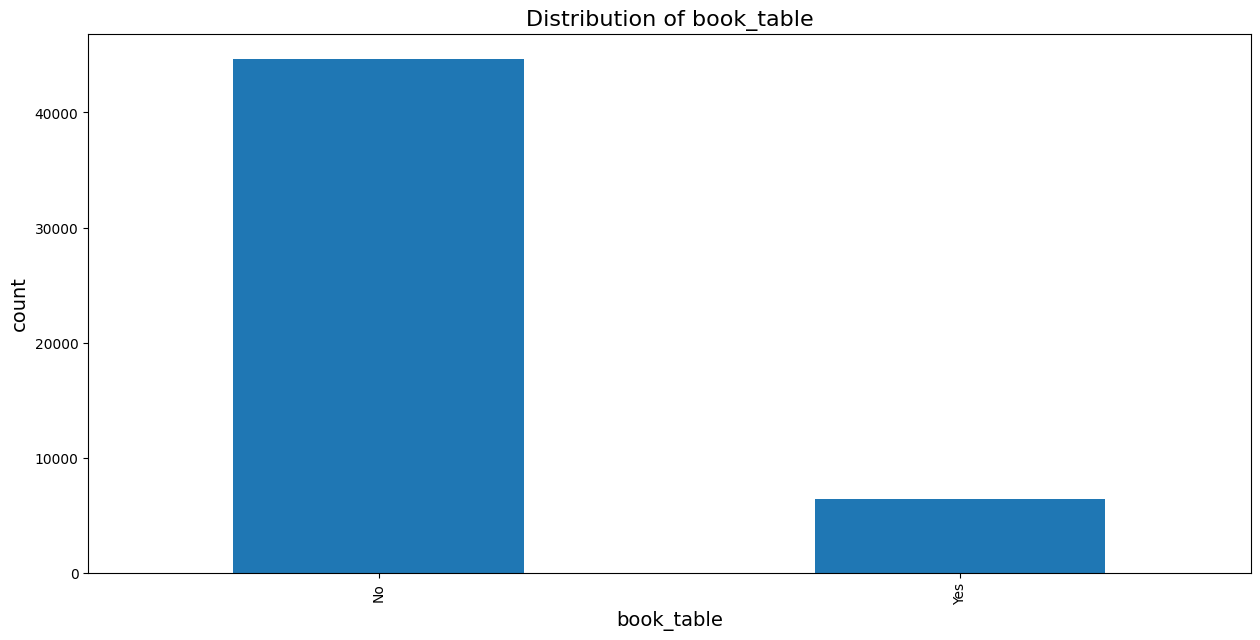

In [ ]:
count_plot(data= data,xcolumn= 'book_table')

## Observations
Most of the restaurants does not have book table facility.

## 6.4 Visualizing online_order Vs rate.

In [ ]:
def box_plot(data=None, xcolumn= None, ycolumn= None):
  figure = plt.figure(figsize=[15,7])
  sns.boxplot(data=data,x= xcolumn, y=ycolumn)
  plt.xlabel(xlabel=xcolumn, size = 14)
  plt.ylabel(ylabel=ycolumn, size= 14)
  plt.title(label= 'box distribution of '+xcolumn+' & '+ycolumn,size=16)
  plt.show()

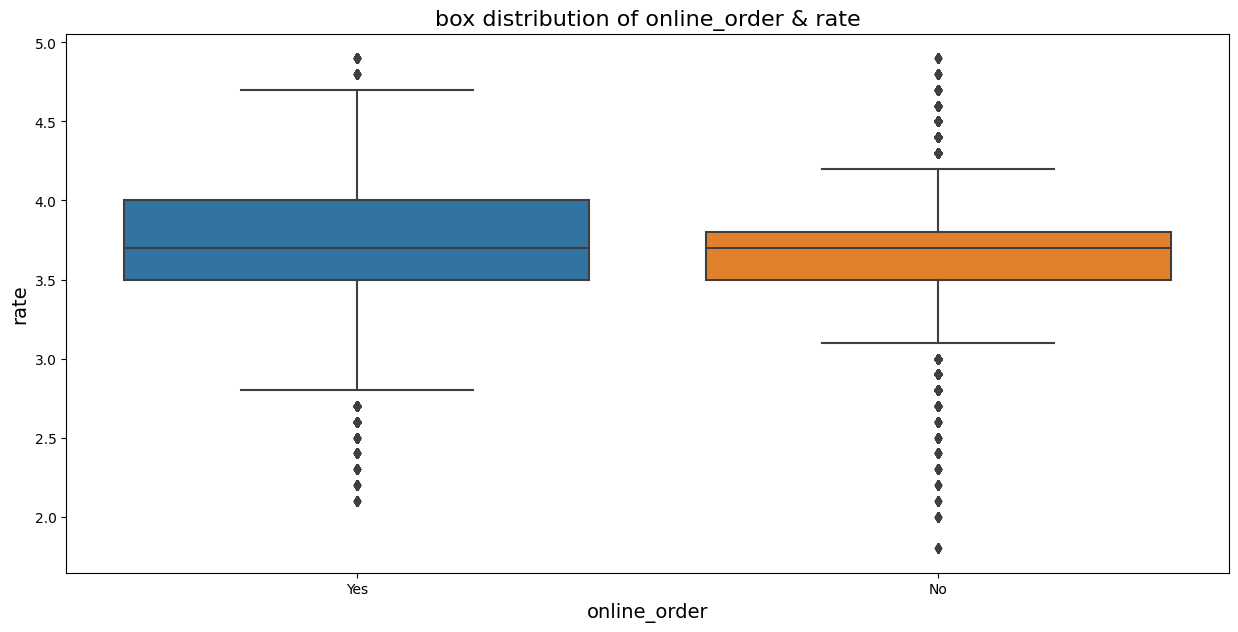

In [ ]:
box_plot(data=data, xcolumn='online_order', ycolumn = 'rate')

## Observations
Restaurants that offer online ordering facilities tend to have higher ratings compared to restaurants that do not provide this service.

## 6.5 Visualizing book_table Vs rate.

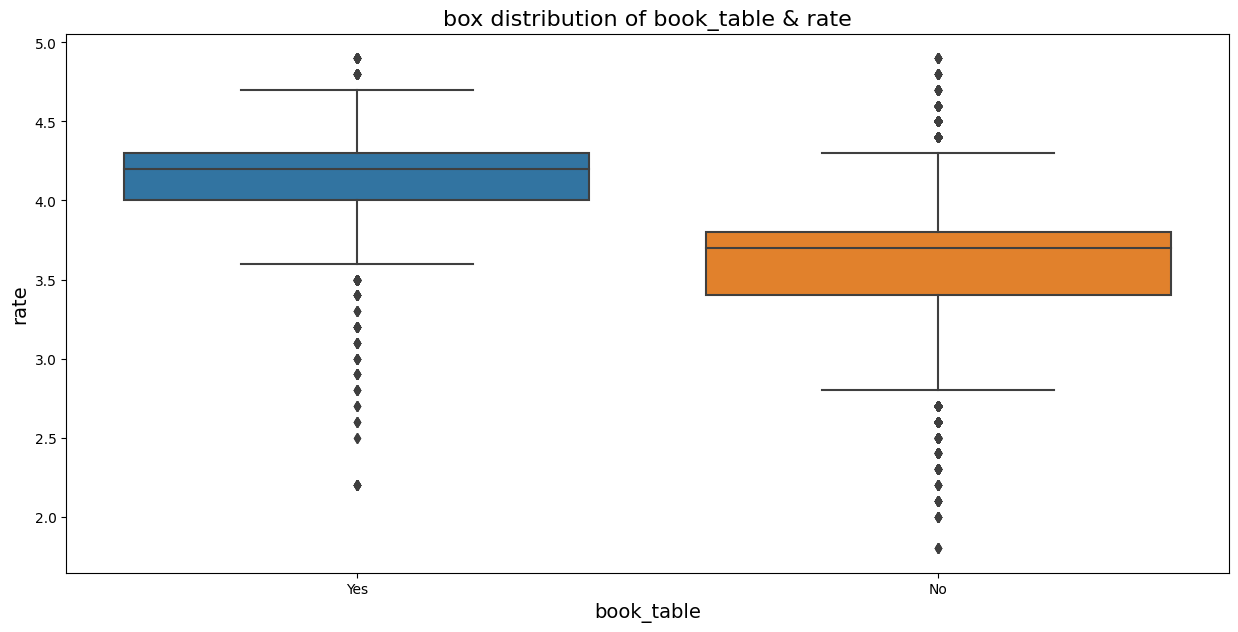

In [ ]:
box_plot(data=data, xcolumn='book_table', ycolumn = 'rate')

## Observations
Restaurants that offer a table booking facility generally receive higher ratings compared to those that do not. Therefore, when opening a hotel, it is advisable to consider implementing a table booking facility.

## 6.6 Visualizing online order facility location wise

In [ ]:
def group_bar_chart(data=None, xcolumn= None, ycolumn =None):
  # figure = plt.figure(figsize=[30,10])
  location_counts = data.groupby([xcolumn, ycolumn]).size().unstack()
  location_counts.plot(kind='bar',stacked= False, figsize=(15,8))

  plt.xlabel(xlabel=xcolumn,size=14)
  plt.ylabel(ylabel=ycolumn,size=14)
  plt.title(label='Grouped bar chart of '+xcolumn+' & '+ycolumn,size=16)
  plt.show()

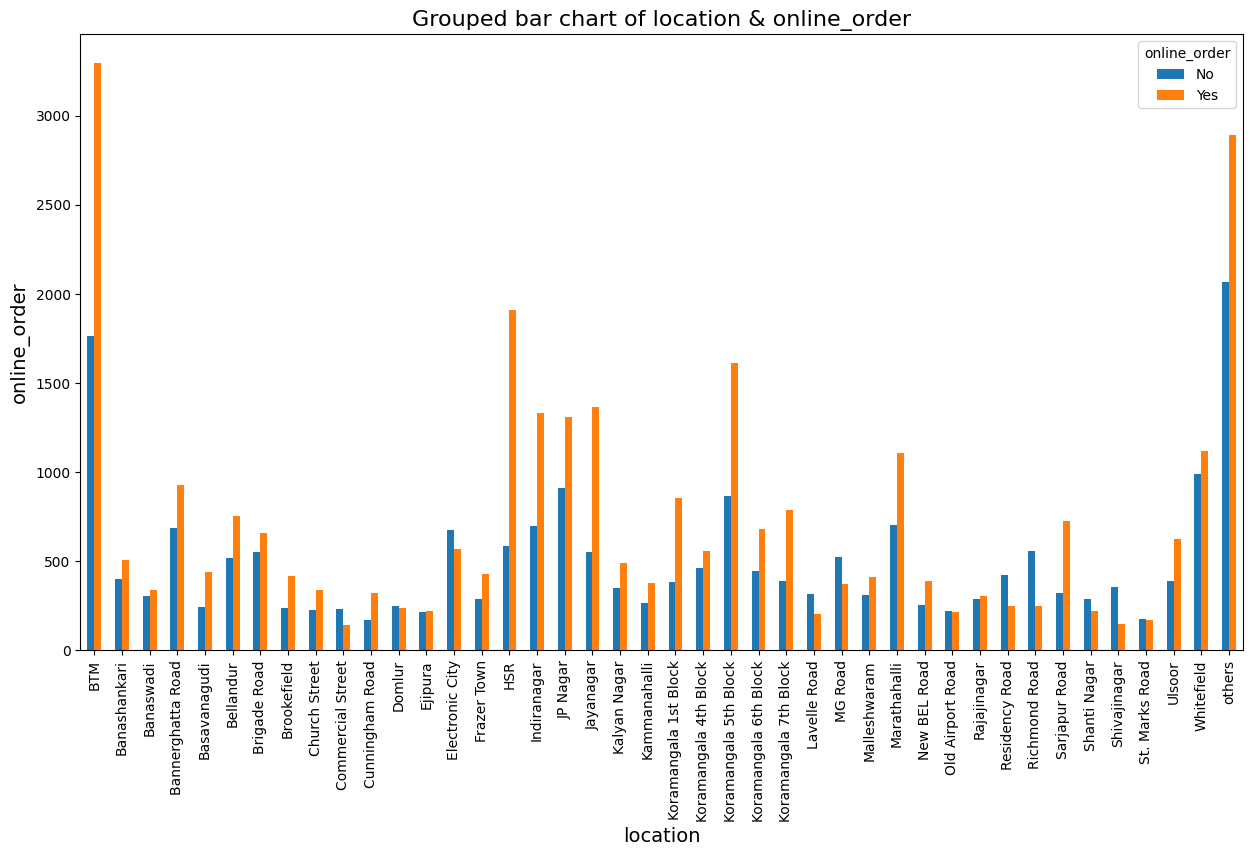

In [ ]:
group_bar_chart(data=data, xcolumn= 'location', ycolumn ='online_order')

## Observations
To maximize the potential success of a restaurant, one should consider opening it in an area where online order facilities are less available. For instance, locations like Lavelle Road, MG Road, Richmond Road, Residency Road, etc.

## 6.7 Visualizing book table facility location wise

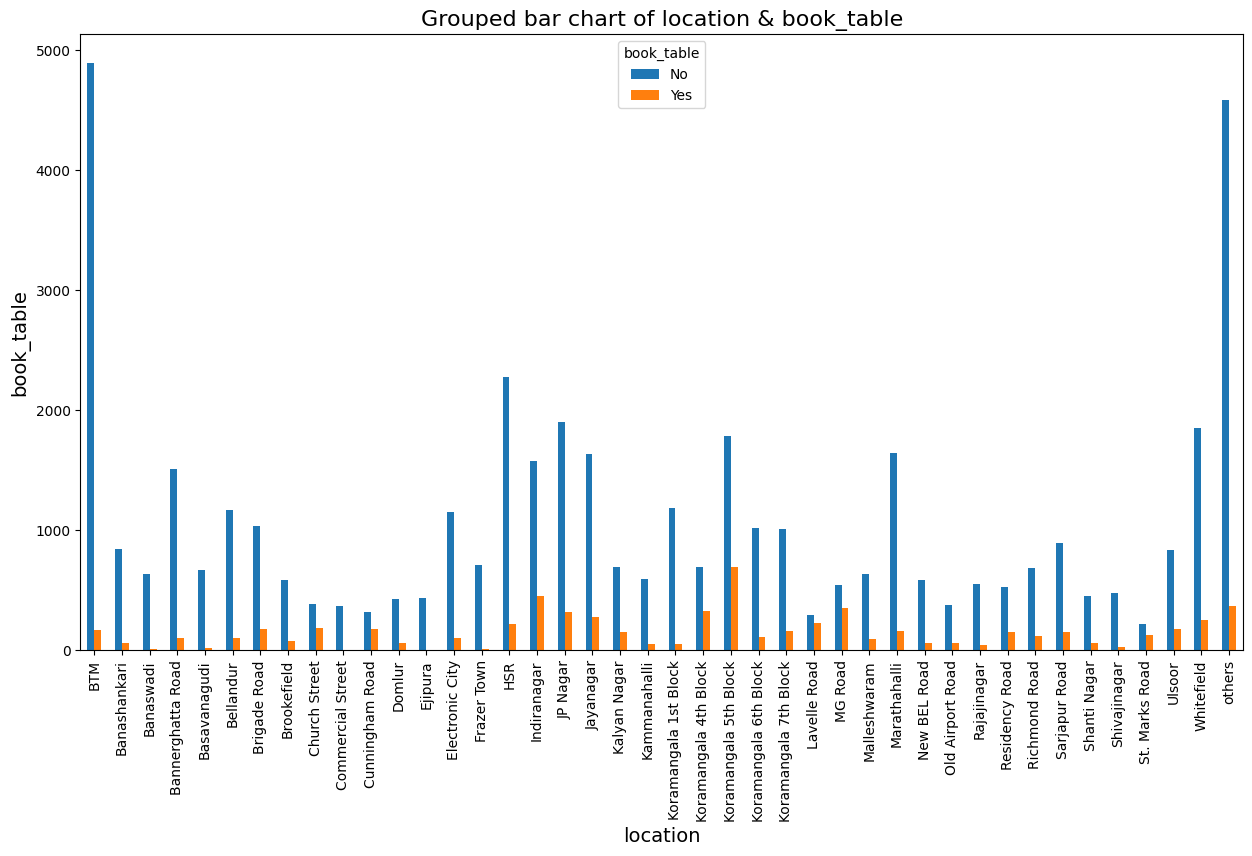

In [ ]:
group_bar_chart(data=data, xcolumn= 'location', ycolumn ='book_table')

## Observations
To maximize the potential success of a restaurant, one should consider opening it in an area where book table facilities are less available and the total restaurant count is relatively low. For instance, locations like Electronic City, HSR, etc. This strategy can be advantageous as couples looking to book a table may choose your restaurant when options are limited.

## 6.8 Visualizing types of restaurants Vs rate.

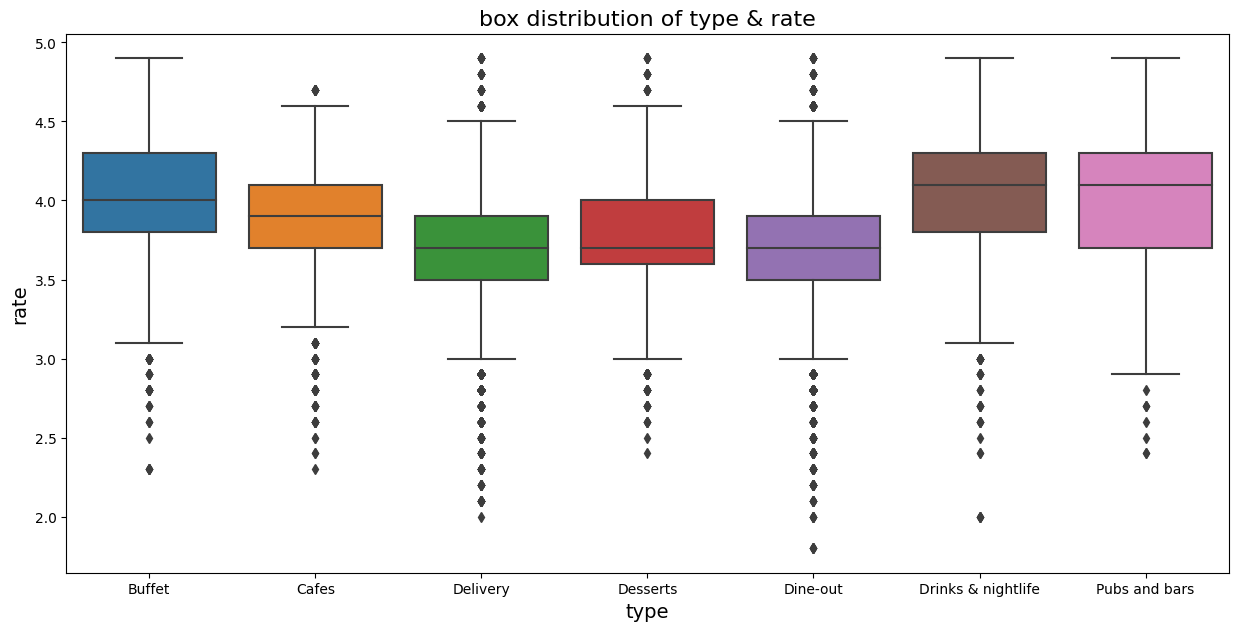

In [ ]:
box_plot(data=data, xcolumn='type', ycolumn = 'rate')

## Observations

To capitalize on higher ratings and customer preferences, one should strongly consider opening restaurants that specialize in Buffet, Drinks and nightlife, and Pubs and Bars. These types of establishments tend to receive comparatively higher ratings, indicating that people enjoy and appreciate them. Conversely, Delivery restaurants tend to have lower ratings. By focusing on the types of restaurants that are well-received and highly rated by customers, there is a greater chance for success and customer satisfaction.

## 6.9 Visualizing types restaurants location wise

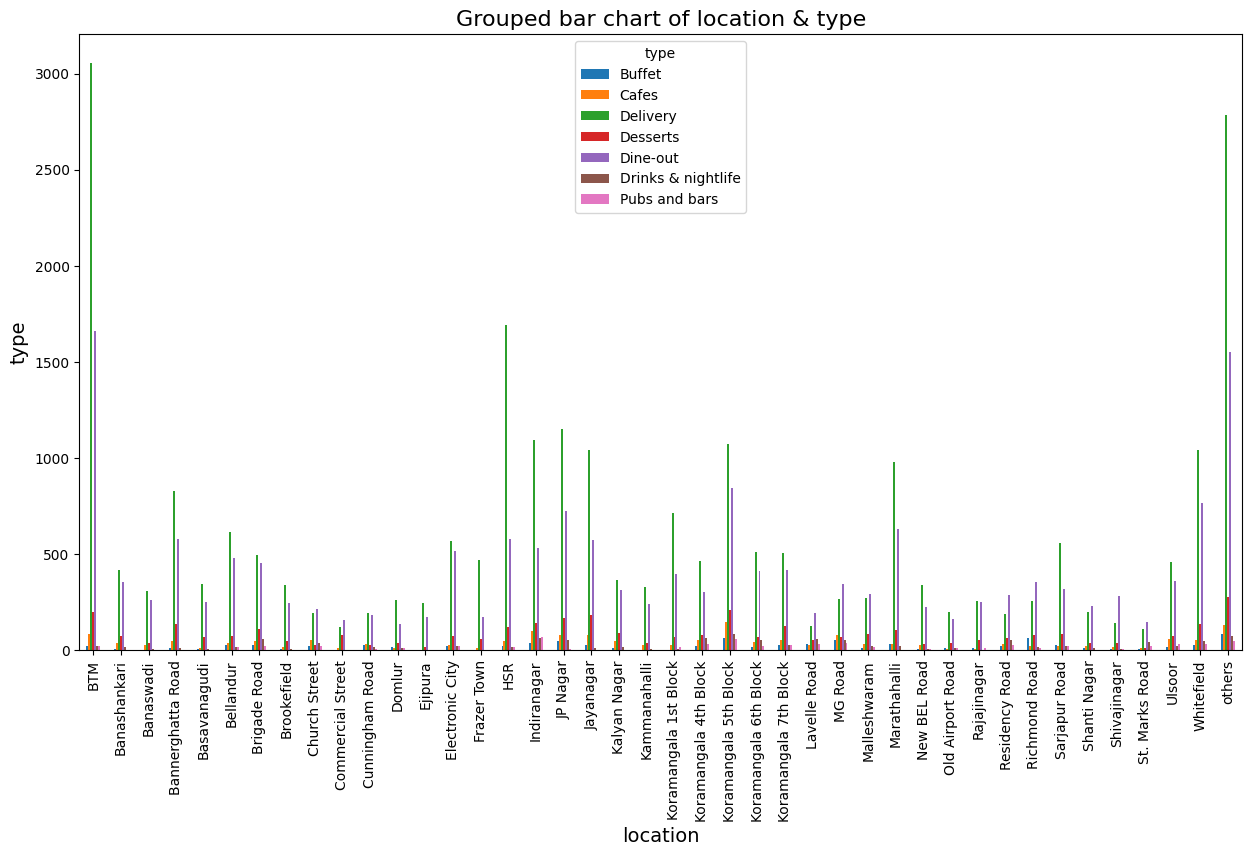

In [ ]:
group_bar_chart(data=data, xcolumn= 'location', ycolumn ='type')

## Observations
To maximize the potential success of a restaurant, it is advisable to consider opening establishments like Pubs and bars in locations such as Frazer Town and New BEL Road. These areas have a relatively lower number of Pubs and bars type restaurants, indicating potential market demand. Additionally, this type of restaurant has received positive ratings from the public, further suggesting a favorable reception. By strategically selecting an area with limited competition and a positive rating trend, there is a higher likelihood of achieving success in the restaurant business.

## 6.10 Visualizing votes, location wise

In [ ]:
df = data[['location', 'votes']]
df.drop_duplicates()
df_2 = df.groupby(['location'])['votes'].sum()
df_2 = df_2.to_frame()
df_2 = df_2.sort_values('votes', ascending = False)
df_2.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

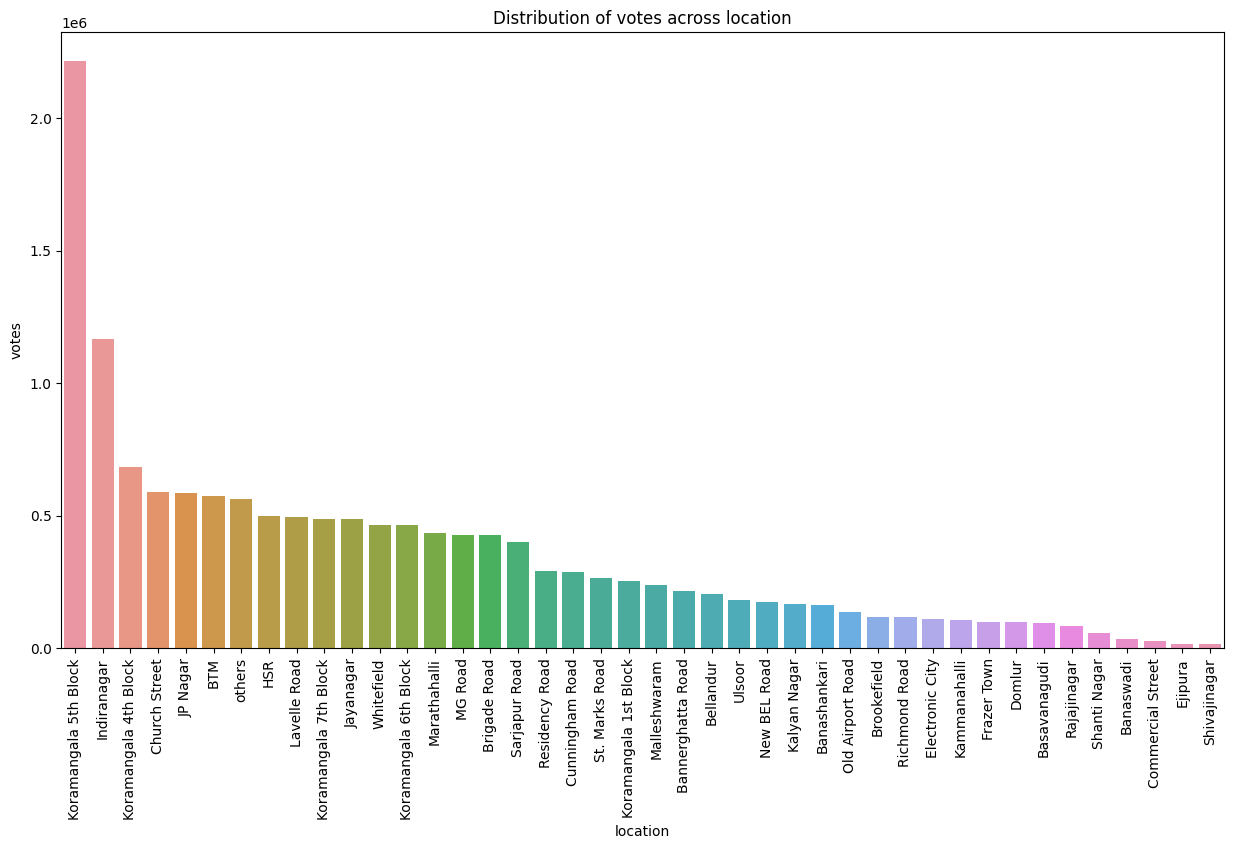

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_2.index,y=df_2['votes'])
plt.title(label='Distribution of votes across location')
plt.xticks(rotation=90)

# Observations
From the above plot, we can determine the areas where people are interested in voting, as their feedback is crucial. In Koramangala 5th Block, the maximum number of votes are cast. People in Koramangala 5th Block are also interested in voting. Therefore, if someone opens a restaurant in Koramangala 5th Block, they will receive very good customer feedback.

## 6.12 Visualizing top cuisines

In [ ]:
df_3 = data[['cuisines','votes']]
df_3.drop_duplicates()
df_4 = df_3.groupby(['cuisines'])['votes'].sum()
df_4 = df_4.to_frame()
df_4 = df_4.sort_values('votes',ascending=False)
df_4.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [ ]:
df_4 = df_4.iloc[1: , :]
df_4.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

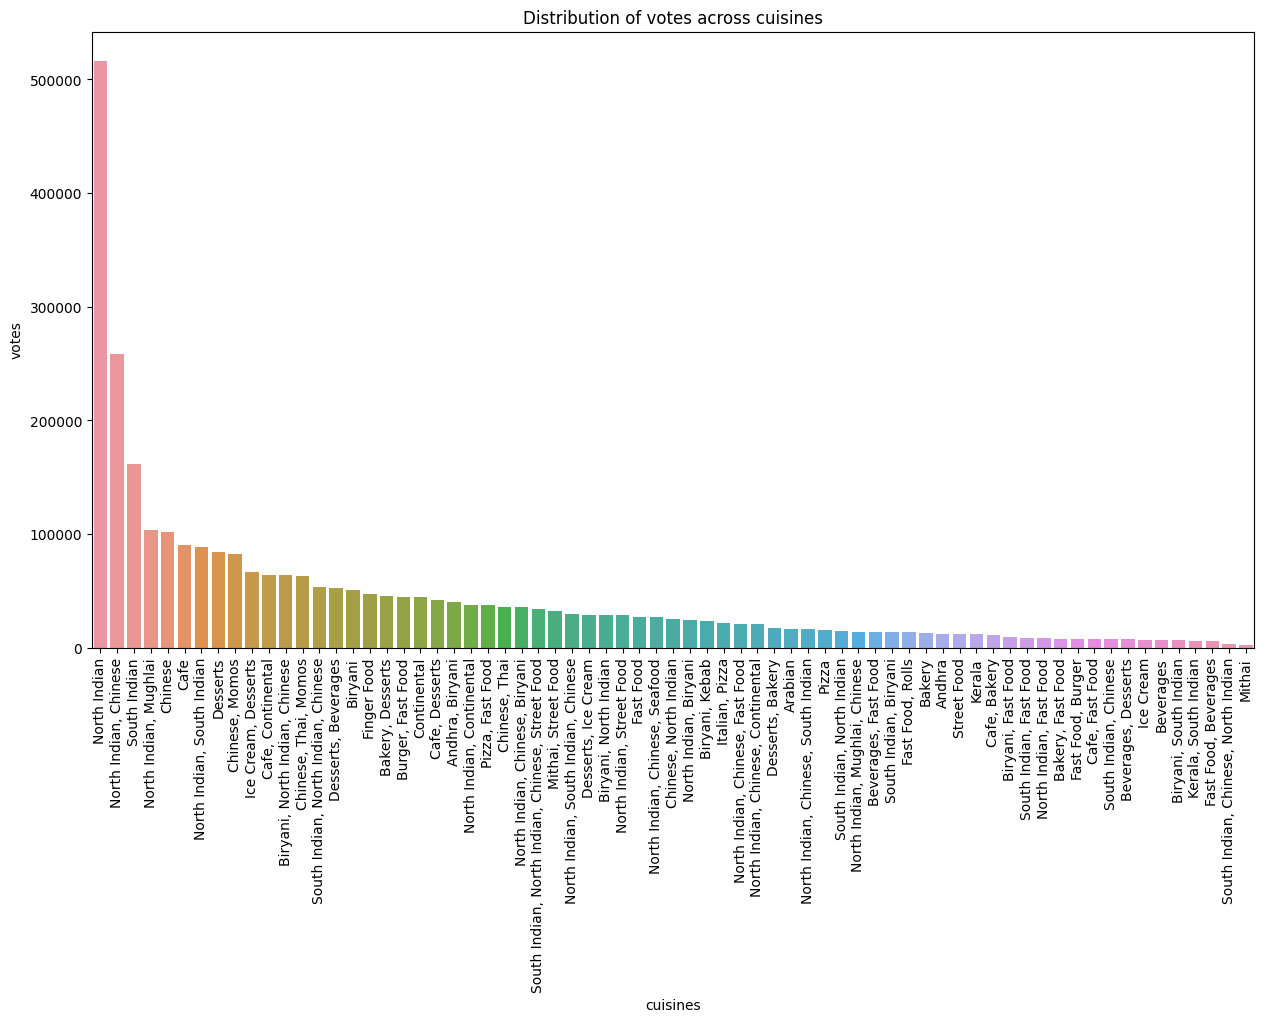

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_4.index,y=df_4['votes'])
plt.title(label='Distribution of votes across cuisines')
plt.xticks(rotation=90)

## Observation
 If one wants to open a restaurant that specializes in a particular cuisine, they should consider opening a North Indian restaurant, a North Indian and Chinese restaurant, or a South Indian restaurant.

# 7. Conclusion

1. Location Selection: It is advisable to avoid opening a restaurant in areas with a high number of existing restaurants, such as 'BTM', 'Jayanagar', 'HSR', 'JP Nagar', 'Indiranagar', etc. Instead, focus on areas with fewer restaurants, such as 'Old Airport Road' or 'St. Marks Road', to increase the chances of success.

2. Online Order Facility: Offering online order facilities is recommended, as it is a common feature among restaurants. However, be aware that restaurants with online order facilities tend to have higher maximum rates compared to those without.

3. Book Table Facility: Restaurants that provide a book table facility tend to have higher ratings. Therefore, considering the inclusion of a book table facility when opening a restaurant can contribute to better customer satisfaction.

4. Target Specific Restaurant Types: To maximize success and customer satisfaction, it is advantageous to focus on restaurant types that receive higher ratings and cater to customer preferences. Specializing in buffet, drinks and nightlife, and pubs and bars can be beneficial, while delivery-focused restaurants tend to have lower ratings.

5. Strategic Location Selection: Consider opening restaurants in areas where online order facilities and book table facilities are less available. Promising locations could include Lavelle Road, MG Road, Richmond Road, and Residency Road.

6. Capitalize on Market Demand: Opening establishments like pubs and bars in areas with limited competition and high market demand, such as Frazer Town and New BEL Road, can increase the chances of success.

7. Customer Feedback: Pay attention to areas where people actively vote and provide feedback. For example, opening a restaurant in Koramangala 5th Block can result in valuable customer feedback.

8. Cuisine Specialization: When planning to specialize in a particular cuisine, focus on popular options like North Indian, North Indian and Chinese, or South Indian cuisines, as they are favored by customers.

By considering these recommendations derived from the exploratory data analysis, individuals can make informed decisions when opening a restaurant in Bengaluru, thereby increasing their chances of success and customer satisfaction.